In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
school_type = pd.read_csv('../csv_files/SchoolType.csv')
school_type_df = pd.DataFrame(school_type)
school_type_df = school_type_df[school_type_df.columns[[9, 12]]]
school_type_df.head()

,name,type
0,Blackshear Elementary School,public
1,Bryker Woods Elementary School,public
2,Casis Elementary School,public
3,Maplewood Elementary School,public
4,Mathews Elementary School,public


In [4]:
for index, row in school_type_df.iterrows():
    if "Elementary School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("Elementary School", "EL").upper()
    if "Middle School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("Middle School", "M S").upper()
    if "High School" in school_type_df['name'][index]:
        school_type_df['name'][index] = school_type_df['name'][index].replace("High School", "H S").upper()
        
school_type_df.head()

,name,type
0,BLACKSHEAR EL,public
1,BRYKER WOODS EL,public
2,CASIS EL,public
3,MAPLEWOOD EL,public
4,MATHEWS EL,public


In [5]:
title_one = pd.read_csv('../csv_files/title_one_2014-2018.csv')
title_one_df = pd.DataFrame(title_one)
title_one_df = title_one_df[['name', '2014-2015 TOTAL ENROLLMENT', '2014-2015 TOTAL TITLE I STUDENTS', '2015-2016 TOTAL ENROLLMENT', '2015-2016 TOTAL TITLE I STUDENTS', '2016-2017 TOTAL ENROLLMENT', '2016-2017 TOTAL TITLE I STUDENTS', '2017-2018 TOTAL ENROLLMENT', '2017-2018 TOTAL TITLE I STUDENTS']]
title_one_df

,name,2014-2015 TOTAL ENROLLMENT,2014-2015 TOTAL TITLE I STUDENTS,2015-2016 TOTAL ENROLLMENT,2015-2016 TOTAL TITLE I STUDENTS,2016-2017 TOTAL ENROLLMENT,2016-2017 TOTAL TITLE I STUDENTS,2017-2018 TOTAL ENROLLMENT,2017-2018 TOTAL TITLE I STUDENTS
0,AKINS H S,2667.0,11.0,2713.0,43.0,2680.0,29.0,2765.0,44.0
1,ALLISON EL,487.0,487.0,545.0,545.0,460.0,460.0,479.0,479.0
2,ALTERNATIVE LEARNING CENTER,166.0,9.0,116.0,2.0,107.0,2.0,101.0,2.0
3,ANDERSON H S,2224.0,11.0,2270.0,16.0,2217.0,11.0,2222.0,24.0
4,ANDREWS EL,657.0,657.0,594.0,594.0,572.0,572.0,504.0,504.0
5,AUSTIN H S,2085.0,11.0,2084.0,15.0,2145.0,10.0,2267.0,22.0
6,AUSTIN ISD CHILD DEVELOPMENT CENTE,NaN,NaN,62.0,0.0,78.0,0.0,170.0,2.0
7,AUSTIN ST HOSPITAL,20.0,0.0,19.0,0.0,23.0,0.0,16.0,0.0
8,BAILEY M S,917.0,11.0,872.0,2.0,899.0,8.0,1006.0,9.0
9,BALDWIN EL,742.0,0.0,787.0,2.0,794.0,0.0,810.0,2.0


In [58]:
df = pd.merge(title_one_df, school_type_df, how='inner', on='name')

df['14-16 Total Enrollment Change'] = df['2015-2016 TOTAL ENROLLMENT'] - df['2014-2015 TOTAL ENROLLMENT']
df['15-17 Total Enrollment Change'] = df['2016-2017 TOTAL ENROLLMENT'] - df['2015-2016 TOTAL ENROLLMENT']
df['16-18 Total Enrollment Change'] = df['2017-2018 TOTAL ENROLLMENT'] - df['2016-2017 TOTAL ENROLLMENT']
df['14-18 Total Enrollment Change'] = df['2017-2018 TOTAL ENROLLMENT'] - df['2014-2015 TOTAL ENROLLMENT']

df['14-16 Percent Title I Change'] = (df['2015-2016 TOTAL TITLE I STUDENTS'] - df['2014-2015 TOTAL TITLE I STUDENTS']) / df['2014-2015 TOTAL TITLE I STUDENTS'] * 100
df['15-17 Percent Title I Change'] = (df['2016-2017 TOTAL TITLE I STUDENTS'] - df['2015-2016 TOTAL TITLE I STUDENTS']) / df['2015-2016 TOTAL TITLE I STUDENTS'] * 100
df['16-18 Percent Title I Change'] = (df['2017-2018 TOTAL TITLE I STUDENTS'] - df['2016-2017 TOTAL TITLE I STUDENTS']) / df['2016-2017 TOTAL TITLE I STUDENTS'] * 100
df['14-18 Percent Title I Change'] = (df['2017-2018 TOTAL TITLE I STUDENTS'] - df['2014-2015 TOTAL TITLE I STUDENTS']) / df['2014-2015 TOTAL TITLE I STUDENTS'] * 100

df = df[['name', 'type', '14-16 Percent Title I Change', '14-16 Total Enrollment Change', '15-17 Percent Title I Change', '15-17 Total Enrollment Change', '16-18 Percent Title I Change', '16-18 Total Enrollment Change', '14-18 Percent Title I Change', '14-18 Total Enrollment Change']]
df.replace(np.inf, 100, inplace=True)
df.replace(np.nan, 0, inplace=True)
df

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change,14-18 Percent Title I Change,14-18 Total Enrollment Change
0,AKINS H S,public,290.909091,46.0,-32.558140,-33.0,51.724138,85.0,300.000000,98.0
1,ALLISON EL,public,11.909651,58.0,-15.596330,-85.0,4.130435,19.0,-1.642710,-8.0
2,ANDERSON H S,public,45.454545,46.0,-31.250000,-53.0,118.181818,5.0,118.181818,-2.0
3,ANDREWS EL,public,-9.589041,-63.0,-3.703704,-22.0,-11.888112,-68.0,-23.287671,-153.0
4,AUSTIN H S,public,36.363636,-1.0,-33.333333,61.0,120.000000,122.0,100.000000,182.0
5,BAILEY M S,public,-81.818182,-45.0,300.000000,27.0,12.500000,107.0,-18.181818,89.0
6,BALDWIN EL,public,100.000000,45.0,-100.000000,7.0,100.000000,16.0,100.000000,68.0
7,BARANOFF EL,public,250.000000,-10.0,-71.428571,36.0,250.000000,-6.0,250.000000,20.0
8,BARRINGTON EL,public,6.632653,39.0,-13.556619,-85.0,0.922509,5.0,-6.972789,-41.0
9,BARTON HILLS EL,public,0.000000,-12.0,-100.000000,20.0,100.000000,28.0,0.000000,36.0


In [59]:
%store df

Stored 'df' (DataFrame)


In [60]:
df.max()

name                             ZILKER EL
type                                public
14-16 Percent Title I Change         24450
14-16 Total Enrollment Change           90
15-17 Percent Title I Change       2336.36
15-17 Total Enrollment Change          173
16-18 Percent Title I Change           250
16-18 Total Enrollment Change          122
14-18 Percent Title I Change         28800
14-18 Total Enrollment Change          235
dtype: object

Text(0, 0.5, 'Percent Change in Title I Students')

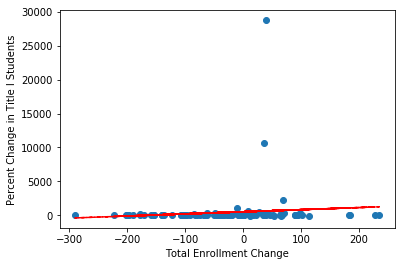

In [72]:
x=df['14-18 Total Enrollment Change']
y=df['14-18 Percent Title I Change']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Total Enrollment Change')
plt.ylabel('Percent Change in Title I Students')

In [62]:
firstR = stats.linregress(x=df['14-18 Total Enrollment Change'], y=df['14-18 Percent Title I Change'])
%store firstR
firstR

Stored 'firstR' (LinregressResult)


LinregressResult(slope=3.12383291143132, intercept=502.70168282749665, rvalue=0.09939012623917257, pvalue=0.30611394422587745, stderr=3.03763710700766)

In [63]:
ethnicity_csv = pd.read_csv('../csv_files/AustinSchools.csv')
ethnicity_df = pd.DataFrame(ethnicity_csv)
ethnicity_df = ethnicity_df[['name', 'White, non-Hispanic', 'Black, non-Hispanic', 'Hispanic', 'Multiracial', 'Asian', 'Native American or Native Alaskan', 'Native Hawaiian or Other Pacific Islander']]

for index, row in ethnicity_df.iterrows():
    if "Elementary School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("Elementary School", "EL").upper()
    if "Middle School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("Middle School", "M S").upper()
    if "High School" in ethnicity_df['name'][index]:
        ethnicity_df['name'][index] = ethnicity_df['name'][index].replace("High School", "H S").upper()
        
ethnicity_df.head()

,name,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander
0,BLACKSHEAR EL,9.97,27.84,57.39,3.09,0.69,1.03,0.00
1,BRYKER WOODS EL,68.25,1.75,20.75,5.00,4.00,0.25,0.00
2,CASIS EL,79.32,1.26,10.84,5.17,3.15,0.13,0.13
3,MAPLEWOOD EL,38.10,17.97,33.55,8.23,2.16,0.00,0.00
4,MATHEWS EL,44.00,5.18,35.76,5.65,8.94,0.24,0.24


In [64]:
final_df = pd.merge(df, ethnicity_df, how='inner', on='name')
final_df.head()

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change,14-18 Percent Title I Change,14-18 Total Enrollment Change,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander
0,AKINS H S,public,290.909091,46.0,-32.558140,-33.0,51.724138,85.0,300.000000,98.0,10.50,8.18,76.82,1.51,2.80,0.07,0.11
1,ALLISON EL,public,11.909651,58.0,-15.596330,-85.0,4.130435,19.0,-1.642710,-8.0,0.55,4.04,95.23,0.00,0.00,0.18,0.00
2,ANDERSON H S,public,45.454545,46.0,-31.250000,-53.0,118.181818,5.0,118.181818,-2.0,50.84,5.90,32.11,3.83,7.09,0.18,0.04
3,ANDREWS EL,public,-9.589041,-63.0,-3.703704,-22.0,-11.888112,-68.0,-23.287671,-153.0,3.70,13.47,79.97,0.17,2.53,0.17,0.00
4,AUSTIN H S,public,36.363636,-1.0,-33.333333,61.0,120.000000,122.0,100.000000,182.0,45.92,4.80,44.19,2.98,1.92,0.10,0.10


In [65]:
hispanic_pop = final_df[final_df['Hispanic']>=50]
hispanic_pop['14-18 Percent Title I Change'].mean()

469.397936520609

In [66]:
white_non_h_pop = final_df[final_df['White, non-Hispanic']>=50]
white_non_h_pop['14-18 Percent Title I Change'].mean()

75.82644628099173

In [67]:
stats.ttest_ind(hispanic_pop['14-18 Percent Title I Change'], white_non_h_pop['14-18 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=0.9524673240099073, pvalue=0.3441502741975958)

In [16]:
hispanic_pop['15-17 Percent Title I Change'].mean()

0.22914811861824588

In [17]:
white_non_h_pop['15-17 Percent Title I Change'].mean()

9.48315805784626

In [18]:
stats.ttest_ind(hispanic_pop['15-17 Percent Title I Change'], white_non_h_pop['15-17 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=-0.42420529242587274, pvalue=0.675707021431514)

In [73]:
hispanic_pop['14-18 Percent Title I Change'].mean()

469.397936520609

In [74]:
white_non_h_pop['14-18 Percent Title I Change'].mean()

75.82644628099173

In [75]:
stats.ttest_ind(hispanic_pop['14-18 Percent Title I Change'], white_non_h_pop['14-18 Percent Title I Change'], equal_var=False)

Ttest_indResult(statistic=0.9524673240099073, pvalue=0.3441502741975958)

In [68]:
final_df['Major Ethnicity'] = ''
for index, row in final_df.iterrows():
    if final_df['Hispanic'][index]>=50:
        final_df['Major Ethnicity'][index] = 'Hispanic'
    elif final_df['White, non-Hispanic'][index]>=50:
        final_df['Major Ethnicity'][index] = 'White, non-Hispanic'
    else:
        final_df['Major Ethnicity'][index] = 'Other'
final_df.head()

,name,type,14-16 Percent Title I Change,14-16 Total Enrollment Change,15-17 Percent Title I Change,15-17 Total Enrollment Change,16-18 Percent Title I Change,16-18 Total Enrollment Change,14-18 Percent Title I Change,14-18 Total Enrollment Change,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,Major Ethnicity
0,AKINS H S,public,290.909091,46.0,-32.558140,-33.0,51.724138,85.0,300.000000,98.0,10.50,8.18,76.82,1.51,2.80,0.07,0.11,Hispanic
1,ALLISON EL,public,11.909651,58.0,-15.596330,-85.0,4.130435,19.0,-1.642710,-8.0,0.55,4.04,95.23,0.00,0.00,0.18,0.00,Hispanic
2,ANDERSON H S,public,45.454545,46.0,-31.250000,-53.0,118.181818,5.0,118.181818,-2.0,50.84,5.90,32.11,3.83,7.09,0.18,0.04,"White, non-Hispanic"
3,ANDREWS EL,public,-9.589041,-63.0,-3.703704,-22.0,-11.888112,-68.0,-23.287671,-153.0,3.70,13.47,79.97,0.17,2.53,0.17,0.00,Hispanic
4,AUSTIN H S,public,36.363636,-1.0,-33.333333,61.0,120.000000,122.0,100.000000,182.0,45.92,4.80,44.19,2.98,1.92,0.10,0.10,Other


Text(0.5, 1.0, 'Boxplot by Major Ethnicity')

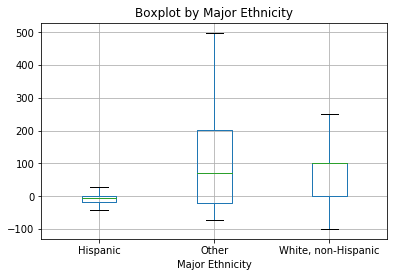

In [69]:
final_df.boxplot("14-18 Percent Title I Change", by="Major Ethnicity", showfliers=False)
plt.suptitle("")
plt.title('Boxplot by Major Ethnicity')

In [24]:
new_total_df = title_one_df[['name', '2014-2015 TOTAL TITLE I STUDENTS', '2015-2016 TOTAL TITLE I STUDENTS', '2016-2017 TOTAL TITLE I STUDENTS', '2017-2018 TOTAL TITLE I STUDENTS']]
ethnicity_total_df = pd.merge(new_total_df, ethnicity_df, how='inner', on='name')
ethnicity_total_df.replace(np.inf, 100, inplace=True)
ethnicity_total_df.replace(np.nan, 0, inplace=True)
ethnicity_total_df.head()

,name,2014-2015 TOTAL TITLE I STUDENTS,2015-2016 TOTAL TITLE I STUDENTS,2016-2017 TOTAL TITLE I STUDENTS,2017-2018 TOTAL TITLE I STUDENTS,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander
0,AKINS H S,11.0,43.0,29.0,44.0,10.50,8.18,76.82,1.51,2.80,0.07,0.11
1,ALLISON EL,487.0,545.0,460.0,479.0,0.55,4.04,95.23,0.00,0.00,0.18,0.00
2,ANDERSON H S,11.0,16.0,11.0,24.0,50.84,5.90,32.11,3.83,7.09,0.18,0.04
3,ANDREWS EL,657.0,594.0,572.0,504.0,3.70,13.47,79.97,0.17,2.53,0.17,0.00
4,AUSTIN H S,11.0,15.0,10.0,22.0,45.92,4.80,44.19,2.98,1.92,0.10,0.10


In [25]:
hispanic_pop = ethnicity_total_df[ethnicity_total_df['Hispanic']>=50]
%store hispanic_pop
hispanic_pop['2017-2018 TOTAL TITLE I STUDENTS'].mean()

Stored 'hispanic_pop' (DataFrame)


473.75757575757575

In [26]:
white_non_h_pop = ethnicity_total_df[ethnicity_total_df['White, non-Hispanic']>=50]
%store white_non_h_pop
white_non_h_pop['2017-2018 TOTAL TITLE I STUDENTS'].mean()

Stored 'white_non_h_pop' (DataFrame)


4.363636363636363

In [27]:
stats.ttest_ind(hispanic_pop['2017-2018 TOTAL TITLE I STUDENTS'], white_non_h_pop['2017-2018 TOTAL TITLE I STUDENTS'], equal_var=False)

Ttest_indResult(statistic=12.365516553397653, pvalue=9.4663898724043e-19)

In [28]:
ethnicity_total_df['Major Ethnicity'] = ''
for index, row in ethnicity_total_df.iterrows():
    if ethnicity_total_df['Hispanic'][index]>=50:
        ethnicity_total_df['Major Ethnicity'][index] = 'Hispanic'
    elif ethnicity_total_df['White, non-Hispanic'][index]>=50:
        ethnicity_total_df['Major Ethnicity'][index] = 'White, non-Hispanic'
    else:
        ethnicity_total_df['Major Ethnicity'][index] = 'Other'
        
%store ethnicity_total_df
ethnicity_total_df.head()

Stored 'ethnicity_total_df' (DataFrame)


,name,2014-2015 TOTAL TITLE I STUDENTS,2015-2016 TOTAL TITLE I STUDENTS,2016-2017 TOTAL TITLE I STUDENTS,2017-2018 TOTAL TITLE I STUDENTS,"White, non-Hispanic","Black, non-Hispanic",Hispanic,Multiracial,Asian,Native American or Native Alaskan,Native Hawaiian or Other Pacific Islander,Major Ethnicity
0,AKINS H S,11.0,43.0,29.0,44.0,10.50,8.18,76.82,1.51,2.80,0.07,0.11,Hispanic
1,ALLISON EL,487.0,545.0,460.0,479.0,0.55,4.04,95.23,0.00,0.00,0.18,0.00,Hispanic
2,ANDERSON H S,11.0,16.0,11.0,24.0,50.84,5.90,32.11,3.83,7.09,0.18,0.04,"White, non-Hispanic"
3,ANDREWS EL,657.0,594.0,572.0,504.0,3.70,13.47,79.97,0.17,2.53,0.17,0.00,Hispanic
4,AUSTIN H S,11.0,15.0,10.0,22.0,45.92,4.80,44.19,2.98,1.92,0.10,0.10,Other


[]

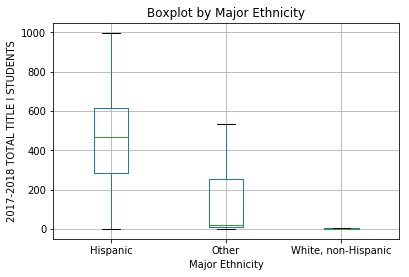

In [76]:
ethnicity_total_df.boxplot("2017-2018 TOTAL TITLE I STUDENTS", by="Major Ethnicity", showfliers=False)
plt.suptitle("")
plt.title('Boxplot by Major Ethnicity')
plt.ylabel('2017-2018 TOTAL TITLE I STUDENTS')
plt.plot()